In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

from scipy.stats import norm
from scipy.stats import multivariate_normal

from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns


In [2]:
class GaussianMixtureModel:
    '''
     This class implements a Gaussian Mixture Model which has several methods for 
     data generation, likelihood calculation, and visualization of the results.
     
    '''
    def __init__(self, n_dimensions, n_components, means, covs, weights):
        '''
        Initializes the class with the number of dimensions, number of components, 
        means, covariance matrices, and weights for each dimension.
        
        Arguments
        n_dimensions [int]: number of dimensions of dataset
        n_components [int]: number of components in the input data
        means [list]: means for each Gaussian component
        covs [list]: covariance matrices for each Gaussian component
        weights [list]: weights for each Gaussian component
        
        '''
        self.n_dimensions = n_dimensions
        self.n_components = n_components
        self.means = means
        self.covs = covs
        self.weights = weights
    
    
    def generate_data(self, n_samples):
        '''
        Generates data samples from the Gaussian Mixture Model.
        It takes the number of samples as input and returns the generated samples.

        Arguments
        n_samples [int]: number of samples in dataset 

        Returns
        X [np.array]: generated dataset which will be used later

        '''
        X = np.empty((n_samples, self.n_dimensions)) # initialize an empty numpy array with the shape to store generated samples
        for i in range(n_samples): 
            component = np.random.choice(self.n_components, p = self.weights)
            X[i, :] = np.random.multivariate_normal(self.means[component], self.covs[component]) 

        return X # return generated dataset 
    
    
    def plot_scatter(self, X):
        '''
        Plots scatter plot for data.
        
        Arguments
        X [np.array]: dataset for which scatter plot will be plotted
        
        Returns
        None
                
        '''
        plt.rcParams["figure.figsize"] = (8, 6)
        
        n_dimensions = X.shape[1]
        
        # 2D data
        if n_dimensions == 2:
            plt.scatter(X[:, 0], X[:, 1], marker = 'o', s = 6, alpha = 0.5)
            plt.title("Scatter plot")
            plt.xlabel("Dimension 1")
            plt.ylabel("Dimension 2")
            plt.show()
        
        # 3D data
        elif n_dimensions == 3:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection = '3d')
            ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker = 'o', s = 6, alpha = 0.5)
            plt.title("Scatter plot")
            ax.set_xlabel("Dimension 1")
            ax.set_ylabel("Dimension 2")
            ax.set_zlabel("Dimension 3")
            plt.show()
            

    def plot_histograms(self, X):
        '''
        Plots histograms for data.

        Arguments
        X [np.array]: dataset for which histograms will be plotted
        
        Returns
        None

        '''

        fig, axs = plt.subplots(X.shape[1], 1, figsize = (6, 3 * X.shape[1]), sharex = True, sharey = True)
        fig.suptitle("Histograms")

        for i in range(X.shape[1]):
            sns.distplot(X[:, i], ax = axs[i])
            axs[i].set_title("Dimension " + str(i + 1))
            axs[i].set_ylabel("Frequency")
        
        plt.show()
        
        

    def pdf(self, X):
        '''
        Calculates the probability density function (pdf) of the Gaussian Mixture Model 
        for a given set of samples in X.
    
    
            p(x_j|θ) is the probability density function at each independent sample with
            θ represents the parameters mean, covariance, and mixture coefficients,
            and x_1, x_2, ... , x_n are the observed samples in dataset X.
        
        
        Arguments
        X [np.array]: dataset for which pdf will be calculated

        Returns
        probs [np.array]: probabilities of the Gaussian Mixture Model for each sample in X
        
        '''
        prob = np.zeros((X.shape[0], self.n_components)) # initialize a numpy array of zeros to store probs of each sample

        for i in range(self.n_components):
            # calculate pdf of each component at each sample in X
            prob[:, i] = self.weights[i] * multivariate_normal.pdf(X, mean = self.means[i], cov = self.covs[i])
        probs = np.sum(prob, axis = 1) # sum probabilities of each component at each sample
        
        return probs

         
        
    def calculate_likelihoods(self, X):
        '''
        Calculates the likelihood of the Gaussian Mixture Model for a given set of samples in X.


            The likelihood is calculated as the product of individual pdfs at the observed samples:

            L(θ) = p(x_1, x_2, ..., x_N|θ) = Π_j=1^N p(x_j|θ)

            Since likelihood of each point may be very small, leading to extremely small products, 
            a log likelihood is often used in practice:

            logL(θ) = Σ_j=1^N log(p(x_j|θ)) 

        
        Arguments
        X [np.array]: dataset for which log-likelihoods will be calculated

        Returns
        log_likelihoods [np.array]: log-likelihood of each sample in dataset X
        
        '''

        log_likelihoods = np.zeros(X.shape[0]) # initialize a numpy array of zeros to store log-likelihoods of each sample
        
        for i, x in enumerate(X):
            log_likelihood = 0 
            for j in range(self.n_components):
                # calculate log-likelihood of each sample by
                # adding product of mixture coefficient and pdf at sample x_j for each Gaussian component k
                log_likelihood += self.weights[j] * multivariate_normal.pdf(x, mean = self.means[j], cov = self.covs[j])
            log_likelihoods[i] = np.log(log_likelihood) # store in log_likelihoods numpy array
        
        return log_likelihoods # return log-likelihood of each sample in dataset X


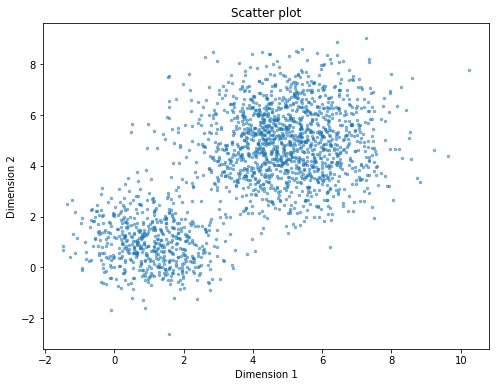

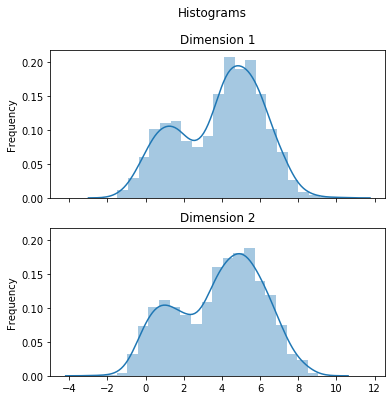

[0.0105729  0.01725183 0.00251712 ... 0.01593261 0.00123656 0.03157893]
[-4.54946115 -4.05983686 -5.98463794 ... -4.13938752 -6.69542476
 -3.45526515]


In [3]:
# Define the Gaussian Mixture Model with 2 dimensions and 2 components
dimensions = 2
components = 2

gmm1 = GaussianMixtureModel(n_dimensions = dimensions, 
                            n_components = components, 
                           means = [[1, 1], [5, 5]], 
                           covs = [[[1, 0], [0, 1]], 
                                 [[2, 0], [0, 2]]], 
                           weights = [0.3, 0.7])


# Initialize the Gaussian Mixture Model class with n samples
n_samples = 2000
X1 = gmm1.generate_data(n_samples)


# Plot the data X
gmm1.plot_scatter(X1)


# Plot the histograms of data X
gmm1.plot_histograms(X1)


# Calculate pdf of the data X 
prob1 = gmm1.pdf(X1)
print(prob1)


# Calculate log-likelihoods of data X
log_likelihood1 = gmm1.calculate_likelihoods(X1)
print(log_likelihood1)


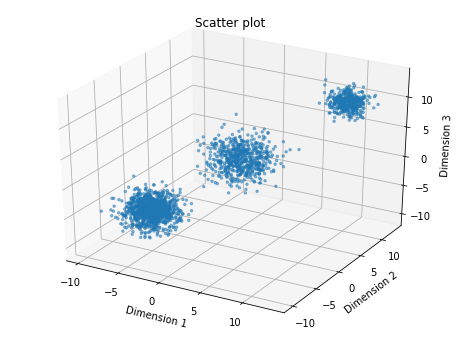

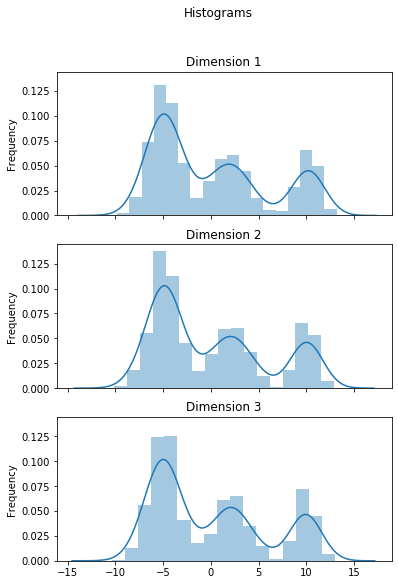

[0.00828089 0.00736685 0.00626767 ... 0.00546301 0.00038233 0.00152169]
[-4.79380441 -4.91076507 -5.07235066 ... -5.20975541 -7.86923187
 -6.48793242]


In [4]:
# Define the Gaussian Mixture Model with 3 dimensions and 3 components
dimensions = 3
components = 3

gmm2 = GaussianMixtureModel(n_dimensions = dimensions, 
                           n_components = dimensions, 
                           means = [[10, 10, 10], [-5, -5, -5], [2, 2, 2]], 
                           covs = [[[1, 0, 0], [0, 1, 0], [0, 0, 1]], 
                                   [[2, 0, 0], [0, 2, 0], [0, 0, 2]],
                                   [[3, 0, 0], [0, 3, 0], [0, 0, 3]]], 
                           weights=[0.2, 0.5, 0.3])


# Initialize the Gaussian Mixture Model class with n samples
n_samples = 2000
X2 = gmm2.generate_data(n_samples)


# Plot the data X
gmm2.plot_scatter(X2)


# Plot the histograms of the data X
gmm2.plot_histograms(X2)


prob2 = gmm2.pdf(X2)
print(prob2)


# Calculate the likelihood of the data X
log_likelihood2 = gmm2.calculate_likelihoods(X2)
print(log_likelihood2)

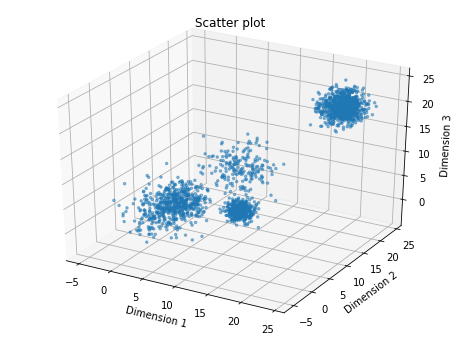

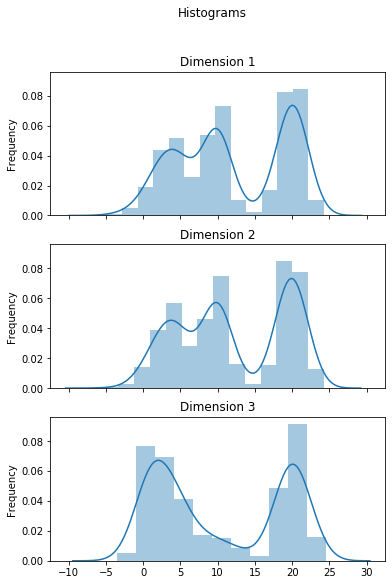

[0.00014056 0.00472987 0.00238866 ... 0.00369817 0.00138282 0.00133587]
[-8.86991115 -5.35385652 -6.03702359 ... -5.59991712 -6.58362688
 -6.61817298]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Gaussian Mixture Model with 3 dimensions and 5 components
dimensions = 3
components = 5

gmm3 = GaussianMixtureModel(n_dimensions = dimensions, 
                           n_components = components, 
                            means = [[10, 10, 1], [2, 2, 2], [20, 20, 20], [4, 4, 4], [10, 10, 10]],
                            covs = [[[1, 0, 0], [0, 1, 0], [0, 0, 1]], 
                                    [[5, 0, 0], [0, 5, 0], [0, 0, 5]],
                                    [[2, 0, 0], [0, 2, 0], [0, 0, 2]],
                                    [[3, 0, 0], [0, 3, 0], [0, 0, 3]],
                                    [[5, 0, 0], [0, 5, 0], [0, 0, 5]]],
                            weights = [0.2, 0.1, 0.4, 0.2, 0.1])
                    
    
# Initialize the Gaussian Mixture Model class with n samples
n_samples = 2000
X3 = gmm3.generate_data(n_samples)


# Plot the data X
gmm3.plot_scatter(X3)


# Plot the histograms of the data X
gmm3.plot_histograms(X3)


# Calculate pdf of the data X 
prob3 = gmm3.pdf(X3)
print(prob3)


# Calculate log-likelihoods of data X
log_likelihood3 = gmm3.calculate_likelihoods(X3)
print(log_likelihood3)

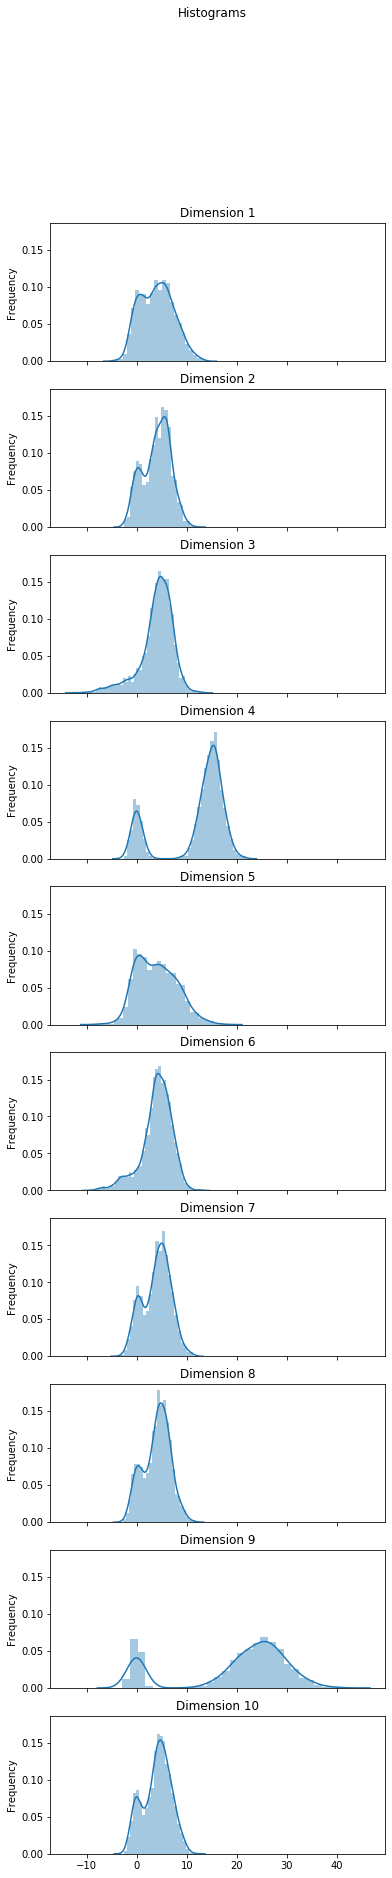

[1.92849551e-09 3.74895222e-10 1.05471156e-10 ... 6.49490416e-08
 8.10515653e-09 6.60925349e-09]
[-20.06652567 -21.70437454 -22.9725836  ... -16.54966285 -18.63076537
 -18.83479513]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Gaussian Mixture Model with 10 dimensions and 2 components
dimensions = 10
components = 2


gmm4 = GaussianMixtureModel(n_dimensions = dimensions, 
                           n_components = components, 
                            means = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                                     [5, 5, 5, 15, 5, 5, 5, 5, 25, 5]],
                            covs = [[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                                     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 
                                     [0, 0, 21, 0, 0, 0, 0, 0, 0, 0], 
                                     [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], 
                                     [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 
                                     [0, 0, 0, 0, 0, 10, 0, 0, 0, 0], 
                                     [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 
                                     [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
                                     [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], 
                                     [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], 
                                    [[8, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                                     [0, 4, 0, 0, 0, 0, 0, 0, 0, 0], 
                                     [0, 0, 4, 0, 0, 0, 0, 0, 0, 0], 
                                     [0, 0, 0, 4, 0, 0, 0, 0, 0, 0], 
                                     [0, 0, 0, 0, 14, 0, 0, 0, 0, 0], 
                                     [0, 0, 0, 0, 0, 4, 0, 0, 0, 0], 
                                     [0, 0, 0, 0, 0, 0, 4, 0, 0, 0], 
                                     [0, 0, 0, 0, 0, 0, 0, 4, 0, 0], 
                                     [0, 0, 0, 0, 0, 0, 0, 0, 24, 0], 
                                     [0, 0, 0, 0, 0, 0, 0, 0, 0, 4]]],
                            weights = [0.2, 0.8])
            
    
# Initialize the Gaussian Mixture Model class with n samples
n_samples = 2000
X4 = gmm4.generate_data(n_samples)


# Plot the histograms of the data X
gmm4.plot_histograms(X4)


# Calculate pdf of the data X 
prob4 = gmm4.pdf(X4)
print(prob4)


# Calculate log-likelihoods of data X
log_likelihood4 = gmm4.calculate_likelihoods(X4)
print(log_likelihood4)
